## Marianne Trujillo Alltamirano
### Exp. 740694
23/03/2023

# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [29]:
import numpy as np
import random 
import matplotlib.pyplot as plt


opciones = [1,-1]

def simX(n):
    caminata = [0]
    posición = 0
    for i in range(n):
        val_aleatorio = random.choice(opciones)
        if val_aleatorio == 1:
            posición = posición + 1*np.sqrt(0.001)
        else:
            posición = posición - 1*np.sqrt(0.001)
        caminata.append(posición)
    return caminata

def simY(n):
    caminata = [0]
    posición = 0
    for i in range(n):
        val_aleatorio = random.choice(opciones)
        if val_aleatorio == 1:
            posición = posición + 1*np.sqrt(0.001)
        else:
            posición = posición - 1*np.sqrt(0.001)
        caminata.append(posición)
    return caminata


def simZ(n):
    caminata = [0]
    posición = 0
    for i in range(n):
        val_aleatorio = random.choice(opciones)
        if val_aleatorio == 1:
            posición = posición + 1*np.sqrt(0.001)
        else:
            posición = posición - 1*np.sqrt(0.001)
        caminata.append(posición)
    return caminata

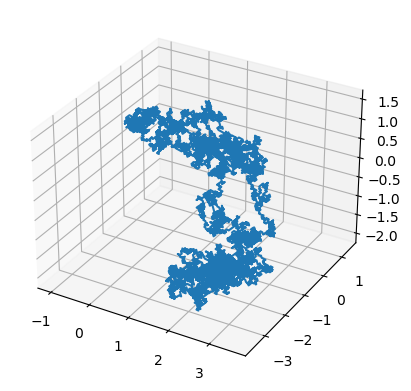

In [30]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style


x = np.array(simX(10000)) #Son 10000 porque es el resultado de 10/0.001
y = np.array(simY(10000))
z = np.array(simZ(10000))

fig=plt.figure()
ax1=fig.add_subplot(111,projection='3d')
plt.plot(x,y,z)
plt.show()


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [117]:
import numpy as np

np.random.seed(2)

def Juego() :
    moneda = ["águila","sello"]
    return np.random.choice(moneda)


def Resultado(): 
    Juego()
    if Juego() == "sello": 
        GANASTE = True 
    else :
        GANASTE = False
    return GANASTE


def Apuesta(C0) :
    C = [C0]
    while C[-1] > 0:
        ganaste = resultado()
        if (C[-1]/2) >= 6 :
            if ganaste :
                C.append(C[-1] + (C[-1]/2))
            else :
                C.append(C[-1] - (C[-1]/2))
        else :
            if ganaste :
                C.append(C[-1] + 2)
            else :
                C.append(C[-1] - 2)
    return C

In [118]:
Apuesta(20)

[20,
 30.0,
 15.0,
 22.5,
 33.75,
 50.625,
 75.9375,
 113.90625,
 170.859375,
 256.2890625,
 128.14453125,
 64.072265625,
 96.1083984375,
 48.05419921875,
 24.027099609375,
 36.0406494140625,
 18.02032470703125,
 27.030487060546875,
 13.515243530273438,
 20.272865295410156,
 10.136432647705078,
 8.136432647705078,
 10.136432647705078,
 12.136432647705078,
 6.068216323852539,
 4.068216323852539,
 2.068216323852539,
 0.06821632385253906,
 2.068216323852539,
 4.068216323852539,
 6.068216323852539,
 4.068216323852539,
 6.068216323852539,
 8.068216323852539,
 10.068216323852539,
 12.068216323852539,
 6.0341081619262695,
 4.0341081619262695,
 6.0341081619262695,
 8.03410816192627,
 6.0341081619262695,
 4.0341081619262695,
 2.0341081619262695,
 0.03410816192626953,
 -1.9658918380737305]

#### *1. Grafique la evolución del capital hasta quedar en cero.*



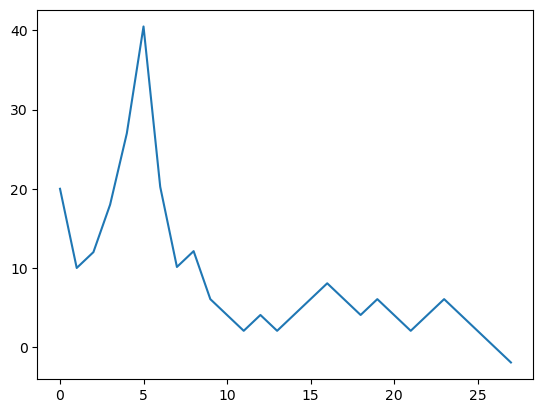

In [141]:
plt.figure()
A = Apuesta(20)
    
for i in range(1) :
    plt.plot(A)

#### *2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.*

In [147]:
num_volados = [] 

for i in range(10000):
    A = Apuesta(20)
    num_volados.append(len(A) - 1)

In [148]:
np.mean(num_volados)

41.8709

**R:** El promedio de volados para 10,000 apostadores para quedar en quiebra es de *41*

#### *3. Muestre un histograma del número de volados.*

(array([5.640e+03, 2.520e+03, 1.072e+03, 4.750e+02, 1.810e+02, 6.700e+01,
        3.000e+01, 1.100e+01, 1.000e+00, 3.000e+00]),
 array([  6. ,  36.9,  67.8,  98.7, 129.6, 160.5, 191.4, 222.3, 253.2,
        284.1, 315. ]),
 <BarContainer object of 10 artists>)

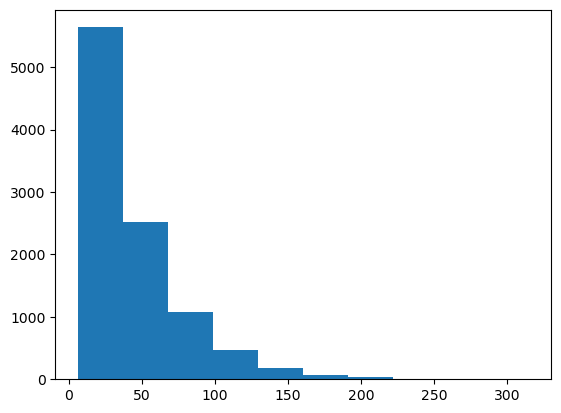

In [135]:
plt.figure()
plt.hist(num_volados)